In [16]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

https://docs.scipy.org/doc/scipy/reference/

# 线性代数

In [6]:
arr = np.random.randn(3,3)

In [7]:
linalg.det(arr)

1.5199010773178248

In [8]:
linalg.inv(arr)

array([[-0.45381841, -0.79451812,  1.02543117],
       [ 0.26831824, -0.56098379,  0.95691162],
       [-0.12912381,  0.23830089,  0.99406712]])

In [9]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])

In [10]:
uarr, spec, vharr = linalg.svd(arr)

In [11]:
spec

array([14.88982544,  0.45294236,  0.29654967])

In [12]:
uarr

array([[-0.1617463 , -0.98659196,  0.02178164],
       [-0.47456365,  0.09711667,  0.87484724],
       [-0.86523261,  0.13116653, -0.48390895]])

In [13]:
vharr

array([[-0.45513179, -0.54511245, -0.70406496],
       [ 0.20258033,  0.70658087, -0.67801525],
       [-0.86707339,  0.45121601,  0.21115836]])

# 插值

In [23]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise
interpolation_time = np.linspace(0, 1, 50)

In [24]:
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)
cubic_interp = interp1d(measured_time, measures, kind='cubic')

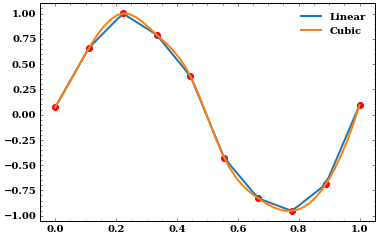

In [27]:
plt.plot(measured_time, measures, "or")
plt.plot(interpolation_time, linear_interp(interpolation_time), label="Linear")
plt.plot(interpolation_time, cubic_interp(interpolation_time), label="Cubic")
plt.legend()

# 优化

## 拟合曲线

In [29]:
from scipy import optimize

In [30]:
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

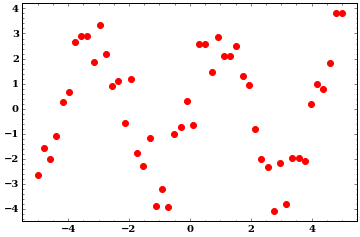

In [35]:
plt.plot(x_data, y_data, "or")

In [36]:
def test_func(x, a, b):
    return a * np.sin(b * x)

In [37]:
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params)

[2.95653906 1.52442642]


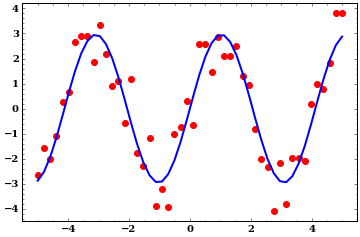

In [39]:
plt.plot(x_data, y_data, "or")
plt.plot(x_data, test_func(x_data, *params), "b")

## 寻找函数最小值

In [40]:
def f(x):
    return x**2 + 10*np.sin(x)

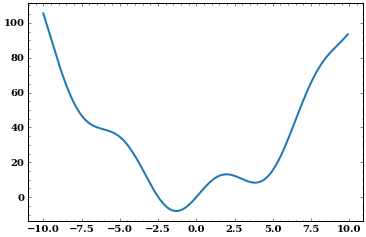

In [41]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.show() 

In [42]:
result = optimize.minimize(f, x0=0)
result 

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])

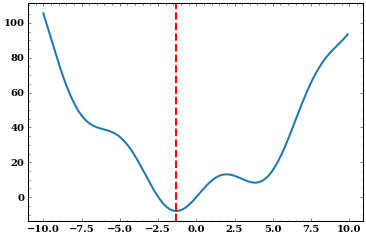

In [45]:
plt.plot(x, f(x)) 
plt.axvline(x=result.x[0], ls="--", color="r")
plt.show() 

In [46]:
optimize.minimize(f, x0=5)

      fun: 8.31558557947746
 hess_inv: array([[0.11879193]])
      jac: array([-1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([3.83746711])

In [48]:
optimize.basinhopping(f, 0)

                        fun: -7.9458233756152845
 lowest_optimization_result:       fun: -7.9458233756152845
 hess_inv: array([[0.08580626]])
      jac: array([5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1512
                        nit: 100
                       njev: 504
                          x: array([-1.30644001])

In [49]:
optimize.root(f, x0=1)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.33310463e-32])
       r: array([-10.])
  status: 1
 success: True
       x: array([0.])

In [50]:
optimize.root(f, x0=-3)

    fjac: array([[-1.]])
     fun: array([-1.77635684e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.83790769e-11])
       r: array([12.84592704])
  status: 1
 success: True
       x: array([-2.47948183])

# 快速傅立叶变换

In [53]:
from scipy import fftpack

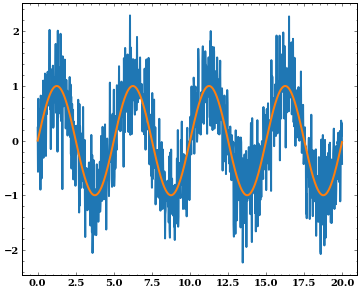

In [58]:
# Seed the random number generator
np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))

sig_orig = (np.sin(2 * np.pi / period * time_vec))

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal+noise')
plt.plot(time_vec, sig_orig, label='Original signal')

[]

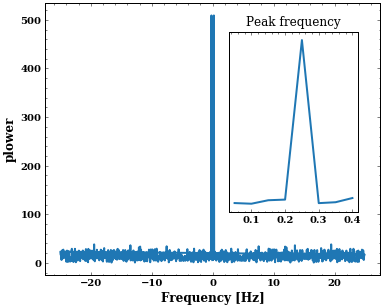

In [55]:
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection

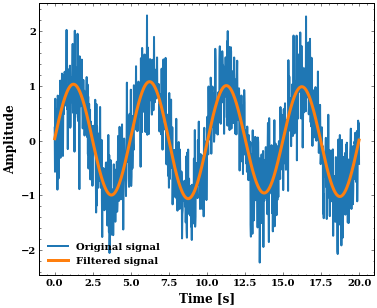

In [57]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

# 信号处理

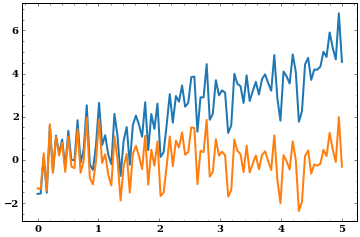

In [59]:
t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)

from scipy import signal
x_detrended = signal.detrend(x)

plt.plot(t, x) 

plt.plot(t, x_detrended) 